<a href="https://colab.research.google.com/github/ahan-2000/Feature-Selection-Using-Genetic-Algo-Regression-Problem-/blob/master/Genetic_Algorithm_for_Feature_Selection_Final_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Uploading the file

from google.colab import files
uploaded = files.upload()

Saving test.xlsx to test.xlsx
Saving train.xlsx to train.xlsx


In [ ]:
!pip install deap

     |████████████████████████████████| 163kB 4.6MB/s 


In [ ]:
!pip install scoop

     |████████████████████████████████| 604kB 4.9MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
  Created wheel for scoop: filename=scoop-0.7.1.1-cp36-none-any.whl size=72125 sha256=bed4b9f9ad054ad525c5c7df5a49fbf0872e8e85eb382673400a58a048b1d0f5
  Stored in directory: /root/.cache/pip/wheels/9e/54/e5/5105f5602fdc4a1fbc911d786ca1114ee8f870ac00752d302f
Successfully built scoop


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from deap import creator, base, tools, algorithms
from scoop import futures
import random
import numpy
from scipy import interpolate
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  
from sklearn import metrics

In [ ]:
#Dataframe

df=pd.read_excel('train.xlsx')
dt=pd.read_excel('test.xlsx')

In [ ]:
df.head()

,SAMPLE ID,LENGTH OF METAL BILLET(IN mm)(L),WIDTH OF METAL BILLET(IN mm),HEIGHT OF METAL BILLET(IN mm),ROLL PRESSURE(IN MPa)\n,AVERAGE FLOW STRESS(бfm)\n(IN MPa)\n,PRESSURE INTENSIFICATION FACTOR(Qp),ROLL SEPERATING FORCE PER UNIT WIDTH(IN KN/mm)
0,1,120,120,12000,950.0,445.3,2.13,130.891
1,2,120,120,12000,975.0,423.0,2.30,134.260
2,3,120,120,12000,953.0,450.5,2.12,131.798
3,4,120,120,12000,982.2,456.5,2.15,135.443
4,5,120,120,12000,1000.5,425.0,2.35,137.827


In [ ]:
dt.head()

,SAMPLE ID,LENGTH OF METAL BILLET (IN mm) (L),WIDTH OF METAL BILLET (IN mm),HEIGHT OF METAL BILLET (IN mm),ROLL PRESSURE (IN MPa)\n,AVERAGE FLOW STRESS(бfm)\n(IN MPa)\n,PRESSURE INTENSIFICATION FACTOR(Qp),ROLL SEPERATING FORCE PER UNIT WIDTH(IN KN/mm) AS PER THE ORIGINAL DATASET,ROLL SEPERATING FORCE PER UNIT WIDTH(IN KN/mm) AS PER THE EMPIRICAL FORMULA
0,1,120,120,12000,950.0,445.3,2.13,132,130.891
1,2,120,120,12000,975.0,423.0,2.30,135,134.260
2,3,120,120,12000,953.0,450.5,2.12,133,131.798
3,4,120,120,12000,982.2,456.5,2.15,136,135.443
4,5,120,120,12000,1000.5,425.0,2.35,138,137.827


In [ ]:
y = df['ROLL SEPERATING FORCE PER UNIT WIDTH(IN KN/mm)']
X = df.drop(['ROLL SEPERATING FORCE PER UNIT WIDTH(IN KN/mm)'], axis=1)

In [ ]:
# Form training, test, and validation sets
X_trainAndTest, X_validation, y_trainAndTest, y_validation = train_test_split(allFeatures, allClasses, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_trainAndTest, y_trainAndTest, test_size=0.20, random_state=42)


In [ ]:
'''
	# Parse our feature columns that we don't use
	# Apply one hot encoding to the features
	cols = [index for index in range(len(individual)) if individual[index] == 0]
	X_trainParsed = X_train.drop(X_train.columns[cols], axis=1)
	X_trainOhFeatures = pd.get_dummies(X_trainParsed)
	X_testParsed = X_test.drop(X_test.columns[cols], axis=1)
	X_testOhFeatures = pd.get_dummies(X_testParsed)

	# Remove any columns that aren't in both the training and test sets
	sharedFeatures = set(X_trainOhFeatures.columns) & set(X_testOhFeatures.columns)
	removeFromTrain = set(X_trainOhFeatures.columns) - sharedFeatures
	removeFromTest = set(X_testOhFeatures.columns) - sharedFeatures
	X_trainOhFeatures = X_trainOhFeatures.drop(list(removeFromTrain), axis=1)
	X_testOhFeatures = X_testOhFeatures.drop(list(removeFromTest), axis=1)
'''

In [ ]:
# Feature subset fitness function
def getFitness(individual, X_train, X_test, y_train, y_test):

 # Apply linear regression on the data, and calculate accuracy
	clf = LinearRegression()
	clf.fit(X_train, y_train)
	predictions = clf.predict(X_test)
	accuracy = metrics.mean_absolute_error(y_test, predictions)

	# Return calculated accuracy as fitness
	return (accuracy,)

In [ ]:
# Create Individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Create Toolbox
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(df.columns) - 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Continue filling toolbox...
toolbox.register("evaluate", getFitness, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [ ]:
def getHof():

	# Initialize variables to use eaSimple
	numPop = 100
	numGen = 10
	pop = toolbox.population(n=numPop)
	hof = tools.HallOfFame(numPop * numGen)
	stats = tools.Statistics(lambda ind: ind.fitness.values)
	stats.register("avg", numpy.mean)
	stats.register("std", numpy.std)
	stats.register("min", numpy.min)
	stats.register("max", numpy.max)

	# Launch genetic algorithm
	pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=numGen, stats=stats, halloffame=hof, verbose=True)

	# Return the hall of fame
	return hof

In [ ]:
getHof()

gen	nevals	avg      	std	min      	max      
0  	100   	0.0553085	0  	0.0553085	0.0553085
1  	67    	0.0553085	0  	0.0553085	0.0553085
2  	56    	0.0553085	0  	0.0553085	0.0553085
3  	64    	0.0553085	0  	0.0553085	0.0553085
4  	60    	0.0553085	0  	0.0553085	0.0553085
5  	59    	0.0553085	0  	0.0553085	0.0553085
6  	64    	0.0553085	0  	0.0553085	0.0553085
7  	52    	0.0553085	0  	0.0553085	0.0553085
8  	49    	0.0553085	0  	0.0553085	0.0553085
9  	57    	0.0553085	0  	0.0553085	0.0553085
10 	52    	0.0553085	0  	0.0553085	0.0553085


In [ ]:
def getMetrics(hof):

	# Get list of percentiles in the hall of fame
	percentileList = [i / (len(hof) - 1) for i in range(len(hof))]
	
	# Gather fitness data from each percentile
	testAccuracyList = []
	validationAccuracyList = []
	individualList = []
	for individual in hof:
		testAccuracy = individual.fitness.values
		validationAccuracy = getFitness(individual, X_trainAndTest, X_validation, y_trainAndTest, y_validation)
		testAccuracyList.append(testAccuracy[0])
		validationAccuracyList.append(validationAccuracy[0])
		individualList.append(individual)
	testAccuracyList.reverse()
	validationAccuracyList.reverse()
	return testAccuracyList, validationAccuracyList, individualList, percentileList


In [ ]:
if __name__ == '__main__':

	'''
	First, we will apply logistic regression using all the features to acquire a baseline accuracy.
	'''
	individual = [1 for i in range(len(allFeatures.columns))]
	testAccuracy = getFitness(individual, X_train, X_test, y_train, y_test)
	validationAccuracy = getFitness(individual, X_trainAndTest, X_validation, y_trainAndTest, y_validation)
	print('\nTest accuracy with all features: \t' + str(testAccuracy[0]))
	print('Validation accuracy with all features: \t' + str(validationAccuracy[0]) + '\n')



Test accuracy with all features: 	0.055308459625655004
Validation accuracy with all features: 	0.059636559675765



In [ ]:

hof = getHof()
testAccuracyList, validationAccuracyList, individualList, percentileList = getMetrics(hof)

	# Get a list of subsets that performed best on validation data
maxValAccSubsetIndicies = [index for index in range(len(validationAccuracyList)) if validationAccuracyList[index] == max(validationAccuracyList)]
maxValIndividuals = [individualList[index] for index in maxValAccSubsetIndicies]
maxValSubsets = [[list(allFeatures)[index] for index in range(len(individual)) if individual[index] == 1] for individual in maxValIndividuals]


print('\n---Optimal Feature Subset(s)---\n')
for index in range(len(maxValAccSubsetIndicies)):
	print('Percentile: \t\t\t' + str(percentileList[maxValAccSubsetIndicies[index]]))
	print('Validation Accuracy: \t\t' + str(validationAccuracyList[maxValAccSubsetIndicies[index]]))
	print('Individual: \t' + str(maxValIndividuals[index]))
	print('Number Features In Subset: \t' + str(len(maxValSubsets[index])))
	print('Feature Subset: ' + str(maxValSubsets[index]))


gen	nevals	avg      	std	min      	max      
0  	100   	0.0553085	0  	0.0553085	0.0553085
1  	56    	0.0553085	0  	0.0553085	0.0553085
2  	53    	0.0553085	0  	0.0553085	0.0553085
3  	59    	0.0553085	0  	0.0553085	0.0553085
4  	65    	0.0553085	0  	0.0553085	0.0553085
5  	60    	0.0553085	0  	0.0553085	0.0553085
6  	62    	0.0553085	0  	0.0553085	0.0553085
7  	67    	0.0553085	0  	0.0553085	0.0553085
8  	64    	0.0553085	0  	0.0553085	0.0553085
9  	61    	0.0553085	0  	0.0553085	0.0553085
10 	51    	0.0553085	0  	0.0553085	0.0553085

---Optimal Feature Subset(s)---

Percentile: 			0.0
Validation Accuracy: 		0.059636559675765
Individual: 	[0, 1, 1, 1, 1, 0, 0]
Number Features In Subset: 	4
Feature Subset: ['LENGTH OF METAL BILLET(IN mm)(L)', 'WIDTH OF METAL BILLET(IN mm)', 'HEIGHT OF METAL BILLET(IN mm) ', 'ROLL PRESSURE(IN MPa)\n']
Percentile: 			0.008695652173913044
Validation Accuracy: 		0.059636559675765
Individual: 	[1, 1, 0, 1, 1, 1, 1]
Number Features In Subset: 	6
Feature Subse

j


'j'

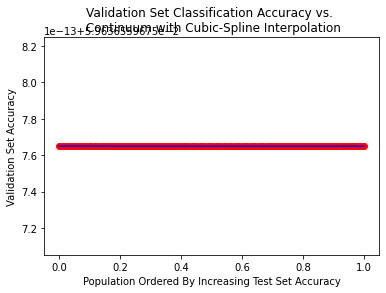

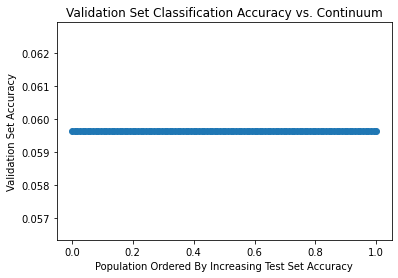

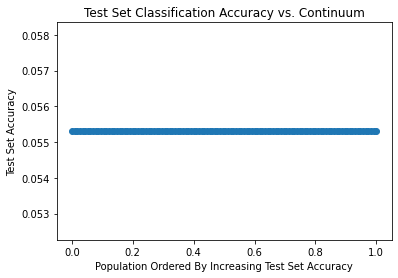

In [ ]:

	# Calculate best fit line for validation classification accuracy (non-linear)
tck = interpolate.splrep(percentileList, validationAccuracyList, s=5.0)
ynew = interpolate.splev(percentileList, tck)

e = plt.figure(1)
plt.plot(percentileList, validationAccuracyList, marker='o', color='r')
plt.plot(percentileList, ynew, color='b')
plt.title('Validation Set Classification Accuracy vs. \n Continuum with Cubic-Spline Interpolation')
plt.xlabel('Population Ordered By Increasing Test Set Accuracy')
plt.ylabel('Validation Set Accuracy')
e.show()

f = plt.figure(2)
plt.scatter(percentileList, validationAccuracyList)
plt.title('Validation Set Classification Accuracy vs. Continuum')
plt.xlabel('Population Ordered By Increasing Test Set Accuracy')
plt.ylabel('Validation Set Accuracy')
f.show()

g = plt.figure(3)
plt.scatter(percentileList, testAccuracyList)
plt.title('Test Set Classification Accuracy vs. Continuum')
plt.xlabel('Population Ordered By Increasing Test Set Accuracy')
plt.ylabel('Test Set Accuracy')
g.show()

input()